# Density Based clustering - DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


In [2]:
len(df)

5575

## Transformation

In [3]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']

#Eliminiamo MinD
del df['MinD']

#Eliminiamo MaxD
del df['MaxD']

#Eliminiamo Ts
del df['Ts']


df.head()

,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:8])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]
 [1.06891201e-02 3.42075257e-02 2.97978746e-02 5.54425513e-01
  1.67671736e-01 1.21932414e-02 1.33855186e-01 8.16972128e-01]
 [1.82086439e-02 8.32383124e-02 2.47968327e-02 6.58015362e-01
  1.67671736e-01 9.78543728e-03 9.31506849e-02 9.40992053e-01]
 [1.02566712e-02 2.56556442e-02 2.97978746e-02 5.25718650e-01
  1.67671736e-01 1.64538813e-02 1.61187215e-01 8.38302990e-01]]

## Stima del valore di epsilon

In [5]:
#imports
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from itertools import product
from scipy.spatial.distance import pdist, squareform

In [6]:
dist = pdist(X, 'euclidean') 
dist = squareform(dist)

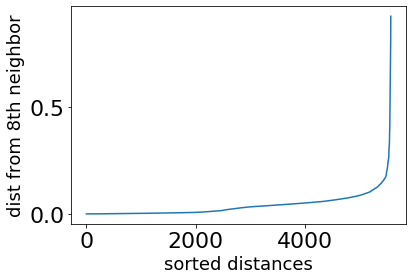

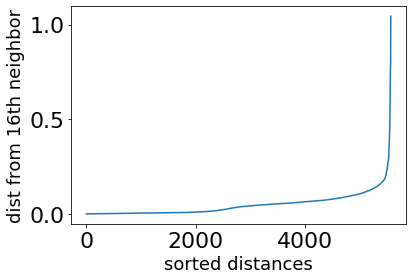

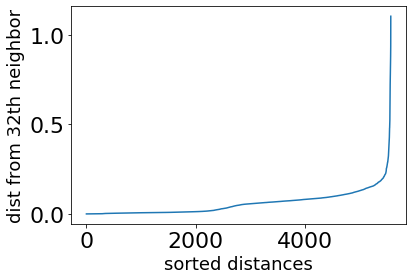

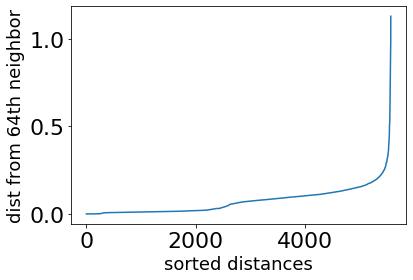

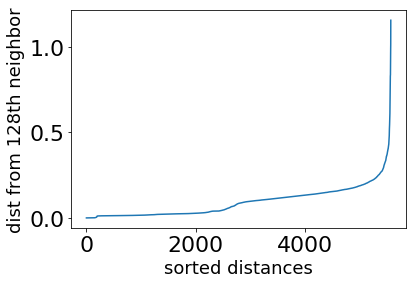

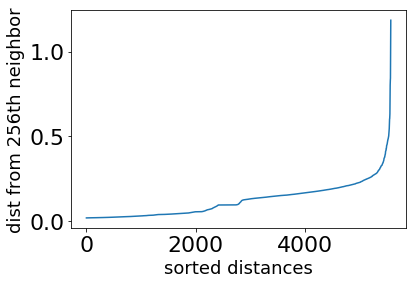

In [7]:
k=[8,16,32,64,128,256]
for current_k in k:
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[current_k]
        kth_distances.append(d[index_kth_distance])
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % current_k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

Al varieare dei vari parametri K abbiamo stimato il valore di epsilon che è intorno allo 0.2

## Scelta valore minpoint
La scelta del valore min point può essere effettuata tramite svariate euristice (2*dim^2 dim+1 ecc) tuttavia abbiamo preferito testare svariate combinazioni di questo parametro in relazione all'epsilon selezionato e vedere la variazione della silhouette prendendo quella massima

In [8]:

grid_params = {"minsamples": [3,14,20,50,100,150,170,180,200,250,300,350,400,450,500,550,600,700,800,1000],"eps":[0.10, 0.15, 0.20,0.25,0.30,0.35, 0.40]}

keys, values = zip(*grid_params.items())

params_list = [dict(zip(keys, v)) for v in product(*values)]
#print(params_list)

In [16]:
value_list = []
max_silhouette = 0

results={}
#Cerchiamo la miglior combinazione tra il valore di epsilon e MinPoints, trovate da KNN
for elem in params_list:
    dbscan = DBSCAN(eps=elem["eps"], min_samples=elem["minsamples"])
    dbscan.fit(X)
    value=silhouette_score(X,dbscan.labels_)
    value_list.append(value)

    results[str(elem)]=(value, np.unique(dbscan.labels_, return_counts=True))


In [20]:
sorted_result = sorted(results.items(), key=lambda kv: kv[1][0])

In [24]:
sorted_result[-40:]

[("{'minsamples': 100, 'eps': 0.35}",
  (0.5090276942056644,
   (array([-1,  0], dtype=int64), array([  19, 5556], dtype=int64)))),
 ("{'minsamples': 150, 'eps': 0.15}",
  (0.5107761444673881,
   (array([-1,  0,  1], dtype=int64),
    array([ 369, 3111, 2095], dtype=int64)))),
 ("{'minsamples': 550, 'eps': 0.4}",
  (0.5108894049010877,
   (array([-1,  0], dtype=int64), array([  21, 5554], dtype=int64)))),
 ("{'minsamples': 500, 'eps': 0.2}",
  (0.5109004426390003,
   (array([-1,  0,  1], dtype=int64),
    array([ 455, 3191, 1929], dtype=int64)))),
 ("{'minsamples': 500, 'eps': 0.4}",
  (0.5127054642862015,
   (array([-1,  0], dtype=int64), array([  20, 5555], dtype=int64)))),
 ("{'minsamples': 3, 'eps': 0.35}",
  (0.5133693420999828,
   (array([-1,  0], dtype=int64), array([   9, 5566], dtype=int64)))),
 ("{'minsamples': 400, 'eps': 0.4}",
  (0.5134398583008244,
   (array([-1,  0], dtype=int64), array([  19, 5556], dtype=int64)))),
 ("{'minsamples': 450, 'eps': 0.4}",
  (0.513439858300

## Training finale

In [25]:
dbscan = DBSCAN(eps=0.15, min_samples=100)
dbscan.fit(X)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))


Silhouette 0.5252769146644224


In [26]:
dbscan.labels_[:8]

array([ 0,  1,  1,  1, -1,  1,  1,  1], dtype=int64)

In [27]:
#Numero di cluster ed elementi all'interno
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 257, 3115, 2203], dtype=int64))

In [29]:
df["labels"]=dbscan.labels_

In [33]:
def info_analisys(column):
    for i in range(0,2):
        print("Column "+column+" for class: "+str(i))
        label_temp = df[df["labels"]==i]
        label_temp[column].plot.density()
        plt.show()
        average = label_temp[column].mean()
        print("Average: "+str(label_temp[column].mean()))
       
        print("Minimum: "+ str(label_temp[column].min()))
        print("Maximum: "+str(label_temp[column].max()))
        print("Customer upper or equal to average: "+str(len(label_temp[label_temp[column]>=average])))
        print("Customer under average: "+str(len(label_temp[label_temp[column]<average])))
        print("-------------------------------------------------")

Column I for class: 0


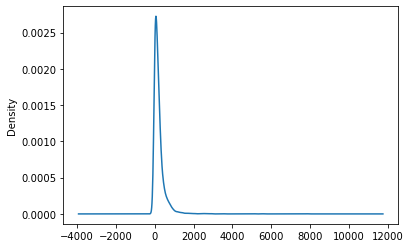

Average: 219.84173354735154
Minimum: 1
Maximum: 7824
Customer upper or equal to average: 997
Customer under average: 2118
-------------------------------------------------
Column I for class: 1


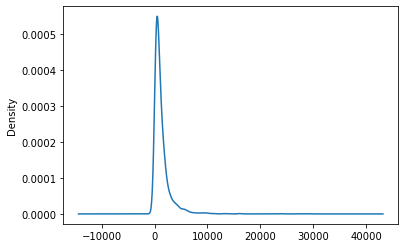

Average: 1291.0844303222877
Minimum: 19
Maximum: 28782
Customer upper or equal to average: 692
Customer under average: 1511
-------------------------------------------------
-------------------------------------------------
Column Iu for class: 0


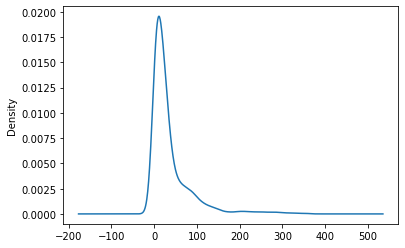

Average: 36.16629213483146
Minimum: 1
Maximum: 357
Customer upper or equal to average: 874
Customer under average: 2241
-------------------------------------------------
Column Iu for class: 1


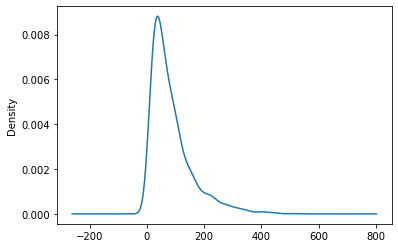

Average: 85.61234679981843
Minimum: 5
Maximum: 536
Customer upper or equal to average: 826
Customer under average: 1377
-------------------------------------------------
-------------------------------------------------
Column Imax for class: 0


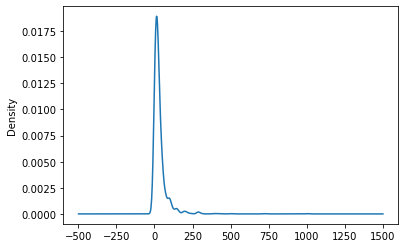

Average: 34.09438202247191
Minimum: 1
Maximum: 1000
Customer upper or equal to average: 923
Customer under average: 2192
-------------------------------------------------
Column Imax for class: 1


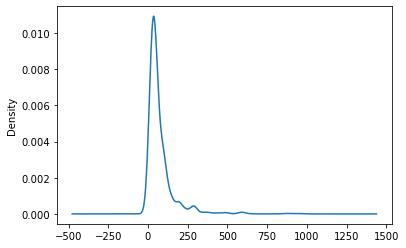

Average: 75.07625964593736
Minimum: 2
Maximum: 960
Customer upper or equal to average: 614
Customer under average: 1589
-------------------------------------------------
-------------------------------------------------
Column E for class: 0


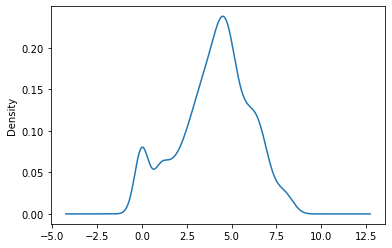

Average: 4.027791457424337
Minimum: 0.0
Maximum: 8.479780264029165
Customer upper or equal to average: 1711
Customer under average: 1404
-------------------------------------------------
Column E for class: 1


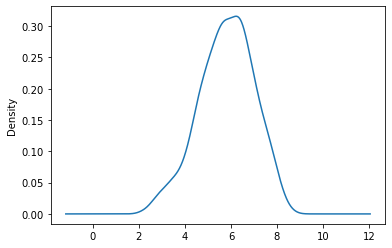

Average: 5.802487070868317
Minimum: 2.128085278891395
Maximum: 8.740909353616217
Customer upper or equal to average: 1145
Customer under average: 1058
-------------------------------------------------
-------------------------------------------------
Column PIL for class: 0


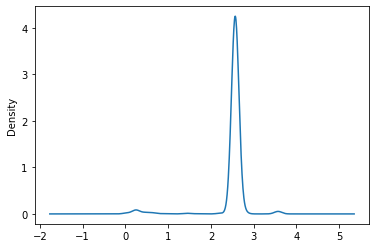

Average: 2.496078651685393
Minimum: 0.009000000000000001
Maximum: 3.57
Customer upper or equal to average: 2981
Customer under average: 134
-------------------------------------------------
Column PIL for class: 1


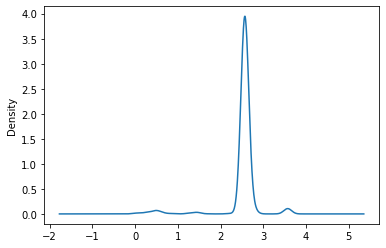

Average: 2.5152256014525642
Minimum: 0.009000000000000001
Maximum: 3.57
Customer upper or equal to average: 2106
Customer under average: 97
-------------------------------------------------
-------------------------------------------------
Column Mb for class: 0


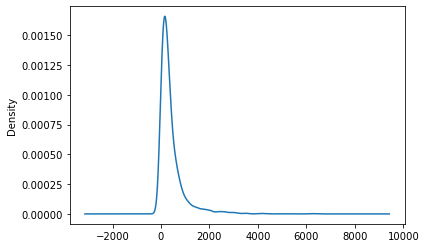

Average: 407.66919062411483
Minimum: 0.39
Maximum: 6278.3
Customer upper or equal to average: 934
Customer under average: 2181
-------------------------------------------------
Column Mb for class: 1


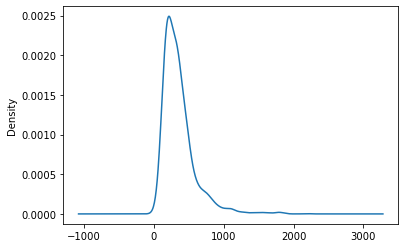

Average: 354.9093695960146
Minimum: 9.14
Maximum: 2188.59
Customer upper or equal to average: 837
Customer under average: 1366
-------------------------------------------------
-------------------------------------------------
Column MeanD for class: 0


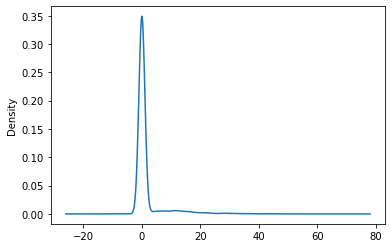

Average: 1.4093765446253408
Minimum: 0.0
Maximum: 52.0
Customer upper or equal to average: 310
Customer under average: 2805
-------------------------------------------------
Column MeanD for class: 1


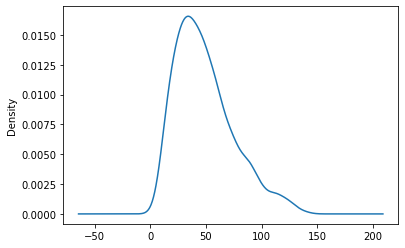

Average: 48.894084691548336
Minimum: 3.929411764705882
Maximum: 140.5
Customer upper or equal to average: 944
Customer under average: 1259
-------------------------------------------------
-------------------------------------------------
Column EDate for class: 0


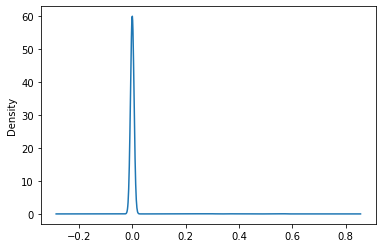

Average: 0.0028128564751257992
Minimum: 0.0
Maximum: 0.5699613760403499
Customer upper or equal to average: 26
Customer under average: 3089
-------------------------------------------------
Column EDate for class: 1


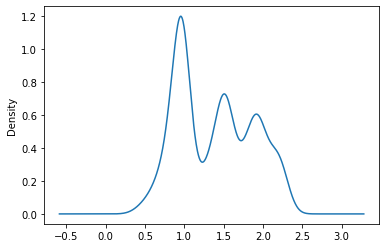

Average: 1.382415188952504
Minimum: 0.3809465857053901
Maximum: 2.314411865238379
Customer upper or equal to average: 1116
Customer under average: 1087
-------------------------------------------------
-------------------------------------------------


In [36]:
info_analisys(column="I")
print("-------------------------------------------------")
info_analisys(column="Iu")
print("-------------------------------------------------")
info_analisys(column="Imax")
print("-------------------------------------------------")
info_analisys(column="E")
print("-------------------------------------------------")
info_analisys(column="PIL")
print("-------------------------------------------------")
info_analisys(column="Mb")
print("-------------------------------------------------")
info_analisys(column="MeanD")
print("-------------------------------------------------")
info_analisys(column="EDate")
print("-------------------------------------------------")
